# Examining word frequencies

In [1]:
# import sys
# !{sys.executable} -m pip install stop-words

In [2]:
import pandas as pd
import numpy as np
import gensim
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import defaultdict # for word frequency
import warnings 
warnings.filterwarnings('ignore')

import pprint
pp = pprint.PrettyPrinter(indent=4)

In [3]:
data = pd.read_csv('data.csv')

In [4]:
# add central bank identifiers
def cb_id(s):
    if 'Australia' in s:
        return 'RBA'
    elif 'US' in s:
        return 'US'
    elif 'European' in s:
        return 'ECB'
    elif 'Japan' in s:
        return 'BoJ'
    elif 'Canada' in s:
        return 'Boc'
    elif 'New Zealand' in s:
        return 'RBNZ'
    elif 'England' in s:
        return 'BoE'
    elif 'Sweden' in s:
        return 'Riksbank'
    elif 'Norges' in s:
        return 'Norges'
        
data['Central_Bank'] = data.ID.map(cb_id)

#### Some preliminary data cleaning
* remove papers with missing abstracts
* remove papers before 2000

In [5]:
# remove papers where the abstract is not available
data          = data[data.Abstract != 'No abstract available']
data          = data[data.Abstract != 'No abstract available for this item']

# remove papers before 1998
data = data[data.Year > '1999']
data = data[data.Year != "undated"]

data.index = range(len(data))

In [6]:
print(data.Central_Bank.value_counts())
print()
print(len(data))

ECB         2285
US          1498
Boc          895
BoE          687
Norges       335
BoJ          281
Riksbank     262
RBA          210
RBNZ         184
Name: Central_Bank, dtype: int64

6637


#### Pre and post GFC split

In [7]:
# remove papers after 2009
data_post_gfc = data[data.Year > '2007']

# remove papers after 2009

data_pre_gfc  = data[data.Year < '2008']

#### Preprocessing functions
* Here I define several functions, which allows me track the impact each pre-processing step has on the number of words
* This is reported in a Table in the paper


In [8]:
from nltk.tokenize import word_tokenize 
from nltk.stem.porter import PorterStemmer
from stop_words import get_stop_words
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# create English stop words list
en_stop1 = set(stopwords.words('english'))
en_stop = set(stopwords.words('english'))
# add context-specific stop words to list
en_stop = en_stop.union(["per","cent","one","two","three","four","five","six","seven","eight","nine","use",
                         "also","paper","results","evidence","suggests","implies","indicates","jel","find",
                         "finding",'hypothesis',"classification","area","effect","may","could","might"
                         ,"canada","canadian","australia","australian","japan","japanese","new zealand",
                         "swedish","sweden","norway","norwegian", "using", "country", "show","change",
                        'found',"author"])
    
def preprocess1(s):
    
    # make lower case
    s = s.lower()
    
    # remove all numbers
    s = re.sub(r'[0-9]+', '', s)
    
    # tokenize string
    token_pattern=r"(?u)\b\w\w+\b"
    token_pattern = re.compile(token_pattern)
    s = token_pattern.findall(s)
        
    return s

def preprocess2(s):
    
    # make lower case
    s = s.lower()
    
    # remove all numbers
    s = re.sub(r'[0-9]+', '', s)
    
    # tokenize string
    token_pattern=r"(?u)\b\w\w+\b"
    token_pattern = re.compile(token_pattern)
    s = token_pattern.findall(s)

    # remove stop words from tokens
    s = [i for i in s if not i in en_stop1]
        
    return s

def preprocess3(s):
    
    # make lower case
    s = s.lower()
    
    # remove all numbers
    s = re.sub(r'[0-9]+', '', s)
    
    # tokenize string
    token_pattern=r"(?u)\b\w\w+\b"
    token_pattern = re.compile(token_pattern)
    s = token_pattern.findall(s)

    # remove stop words from tokens
    s = [i for i in s if not i in en_stop]
        
    return s
    
def preprocess4(s):
    
    # make lower case
    s = s.lower()
    
    # remove all numbers
    s = re.sub(r'[0-9]+', '', s)
        
    # create lemmatizer of class WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # tokenize string
    token_pattern=r"(?u)\b\w\w+\b"
    token_pattern = re.compile(token_pattern)
    s = token_pattern.findall(s)
    
    # lemmatize words
    s = [lemmatizer.lemmatize(i) for i in s] 
    
    # remove stop words from tokens
    s = [i for i in s if not i in en_stop]
    
    return s

#### Examine word counts

In [9]:
from operator import itemgetter

abst1  = data.Abstract.map(preprocess1)

freq1 = defaultdict(int)
for sent in abst1:
    for i in sent:
        freq1[i] += 1
len(freq1)

freq1 = sorted(freq1.items(), key=itemgetter(1),reverse=True)
freq1 = pd.DataFrame(freq1,columns=["word","count"])

In [10]:
from operator import itemgetter

abst2  = data.Abstract.map(preprocess2)

freq2 = defaultdict(int)
for sent in abst2:
    for i in sent:
        freq2[i] += 1
len(freq2)

freq2 = sorted(freq2.items(), key=itemgetter(1),reverse=True)
freq2 = pd.DataFrame(freq2,columns=["word","count"])

In [11]:
from operator import itemgetter

abst3  = data.Abstract.map(preprocess3)

freq3 = defaultdict(int)
for sent in abst3:
    for i in sent:
        freq3[i] += 1
len(freq3)

freq3 = sorted(freq3.items(), key=itemgetter(1),reverse=True)
freq3 = pd.DataFrame(freq3,columns=["word","count"])

In [12]:
from operator import itemgetter

abst4  = data.Abstract.map(preprocess4)

freq4 = defaultdict(int)
for sent in abst4:
    for i in sent:
        freq4[i] += 1

freq4 = sorted(freq4.items(), key=itemgetter(1),reverse=True)
freq4 = pd.DataFrame(freq4,columns=["word","count"])

#### For the Table in the paper

In [13]:
print(freq1["count"].sum(),freq2["count"].sum(),freq3["count"].sum(),freq4["count"].sum())
print()
print(len(freq1),len(freq2),len(freq3),len(freq4))

923555 577729 539889 537990

15159 15039 14994 13226


#### Apply preprocessing

In [14]:
abst_post_gfc = data_post_gfc.Abstract.map(preprocess4)
abst_pre_gfc  = data_pre_gfc.Abstract.map(preprocess4)

#### Create a dictionary with word frequencies

In [15]:
freq_post_gfc = defaultdict(int)
for sent in abst_post_gfc:
    for i in sent:
        freq_post_gfc[i] += 1
len(freq_post_gfc)

freq_pre_gfc = defaultdict(int)
for sent in abst_pre_gfc:
    for i in sent:
        freq_pre_gfc[i] += 1
        
print(len(freq_pre_gfc),len(freq_post_gfc))

8675 11108


#### Create a list of tuples from dict. and sort

In [16]:
from operator import itemgetter

sort_freq_post_gfc = sorted(freq_post_gfc.items(), key=itemgetter(1),reverse=True)
sort_freq_pre_gfc  = sorted(freq_pre_gfc.items(), key=itemgetter(1),reverse=True)

#### Create pandas data frames

In [17]:
# post GFC
df_post               = pd.DataFrame(sort_freq_post_gfc,columns=["word","count"])
df_post["share_word"] = (df_post["count"]/df_post["count"].sum())*100

# pre GFC
df_pre                = pd.DataFrame(sort_freq_pre_gfc,columns=["word","count"])
df_pre["share_word"]  = (df_pre["count"]/df_pre["count"].sum())*100

# combined
df                    = pd.merge(df_post, df_pre,on='word')
df['diff']            = df['share_word_x']-df['share_word_y'] 

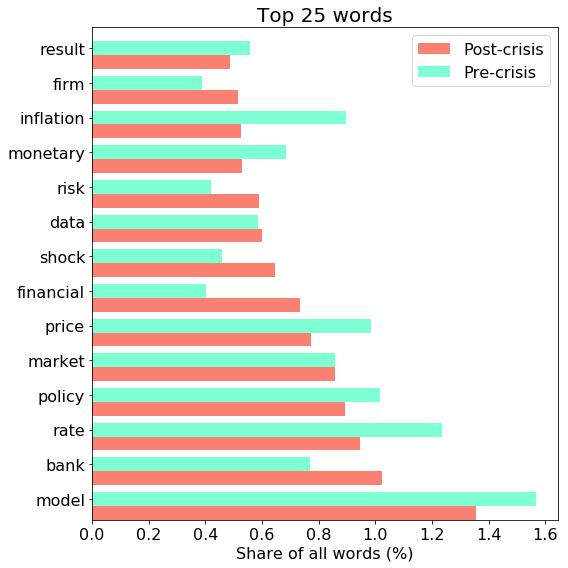

In [18]:
plt.style.use('seaborn-bright')

fig, ax = plt.subplots(figsize=(8,8))
ind     = np.arange(len(df[:14]))
width   = 0.4

ax.barh(ind, df["share_word_x"][:14], width, color='salmon', label='N')
ax.barh(ind + width, df["share_word_y"][:14], width, color='aquamarine', label='M')
ax.set_title('Top 25 words',fontsize=20)

ax.set(yticks=ind + width, yticklabels=df["word"][:14], ylim=[2*width - 1, len(df[:14])])
ax.legend(['Post-crisis','Pre-crisis'],fontsize=16)

ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.set_xlabel('Share of all words (%)',fontsize=16)

plt.tight_layout()
plt.savefig('word_freq.pdf')
plt.show()

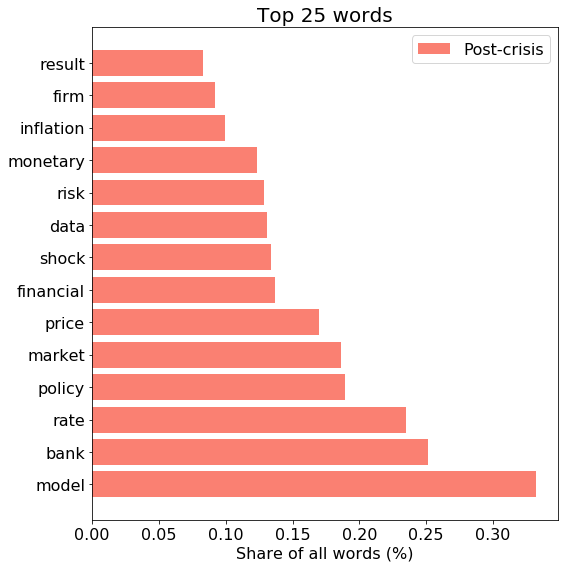

In [19]:
plt.style.use('seaborn-bright')

fig, ax = plt.subplots(figsize=(8,8))
ind     = np.arange(len(df[:14]))

ax.barh(ind, df.sort_values(by='diff',ascending=False)["diff"][:14], color='salmon', label='N')
ax.set_title('Top 25 words',fontsize=20)

ax.set(yticks=ind, yticklabels=df["word"][:14])
ax.legend(['Post-crisis','Pre-crisis'],fontsize=16)

ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.set_xlabel('Share of all words (%)',fontsize=16)

plt.tight_layout()
plt.savefig('word_freq.pdf')
plt.show()

In [20]:
df.sort_values(by='diff',ascending=True)["word"][:14]

11       inflation
2             rate
0            model
5            price
59          output
70        exchange
164           rule
10        monetary
3           policy
17        interest
77       empirical
146        optimal
149      estimated
114    equilibrium
Name: word, dtype: object

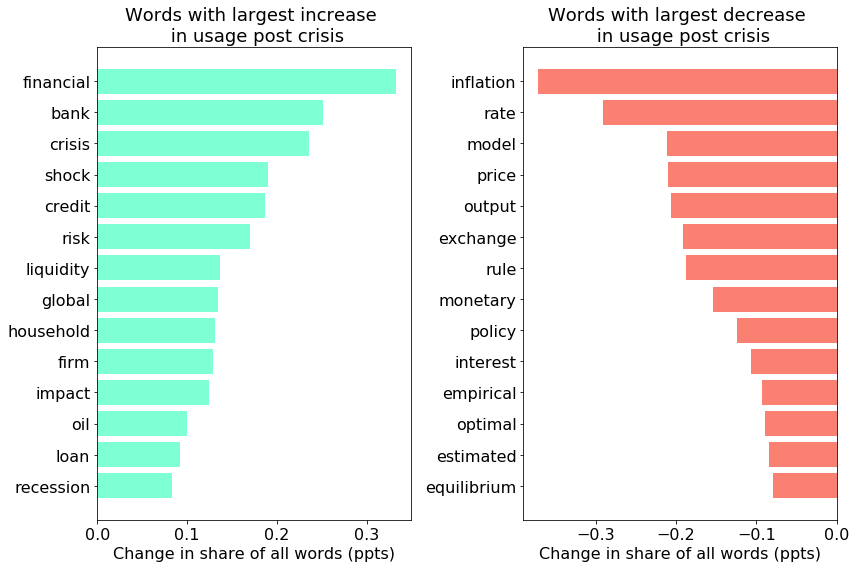

In [33]:
# fig, ax = plt.subplots()
f, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12,8))

ax1.barh(ind, df.sort_values(by='diff',ascending=False)["diff"][:14], color='aquamarine', label='N')
ax1.set_title('Top 25 words',fontsize=20)
ax1.set(yticks=ind, yticklabels=df.sort_values(by='diff',ascending=False)["word"][:14])
# ax1.legend(['Post-crisis'],fontsize=16)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax1.set_xlabel('Change in share of all words (ppts)',fontsize=16)
ax1.invert_yaxis()  # labels read top-to-bottom
ax1.set_title('Words with largest increase \n in usage post crisis',fontsize=18)

ax2.barh(ind, df.sort_values(by='diff',ascending=True)["diff"][:14], color='salmon', label='N')
ax2.set_title('Words with largest decrease \n in usage post crisis',fontsize=18)
ax2.set(yticks=ind, yticklabels=df.sort_values(by='diff',ascending=True)["word"][:14])
# ax2.legend(['Pre-crisis'],fontsize=16)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax2.set_xlabel('Change in share of all words (ppts)',fontsize=16)
ax2.invert_yaxis()  # labels read top-to-bottom

ax1.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 16)

f.tight_layout()
plt.savefig('word_freq.pdf')
plt.show()


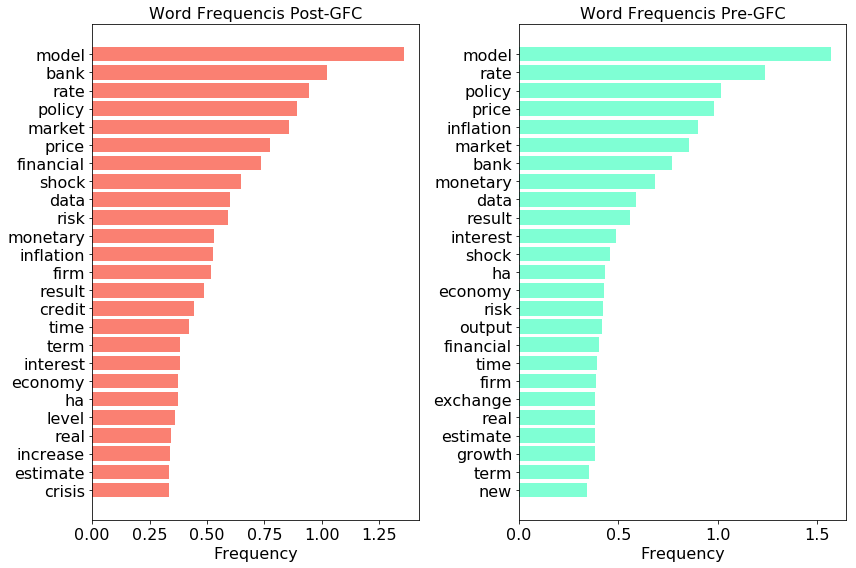

In [22]:
# fig, ax = plt.subplots()
f, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12,8))

ax1.barh(df_post["word"][:25],df_post["share_word"][:25], align='center',
        color='salmon')
ax1.set_yticks(df_post["word"][:25])
ax1.invert_yaxis()  # labels read top-to-bottom
ax1.set_xlabel('Frequency',fontsize=16)
ax1.set_title('Word Frequencis Post-GFC',fontsize=16)

ax2.barh(df_pre["word"][:25],df_pre["share_word"][:25], align='center',
        color='aquamarine')
ax2.set_yticks(df_pre["word"][:25])
ax2.invert_yaxis()  # labels read top-to-bottom
ax2.set_xlabel('Frequency',fontsize=16)
ax2.set_title('Word Frequencis Pre-GFC',fontsize=16)

ax1.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 16)

f.tight_layout()
plt.show()